In [21]:
pip install pandas numpy nltk scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Exploring the Dataset 

In [22]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [23]:
data = pd.read_csv("News Dataset.csv")

In [24]:
print(data.head())  # First 5 rows
print(data.tail())  # Last 5 rows


                                      headline category               date  \
0  የኦሊምፒክ ማጣሪያ ተሳታፊዎች የሚለዩበት ቻምፒዮና እየተካሄደ ይገኛል     ስፖርት   January 14, 2021   
1                                   አዲስ ዘመን ድሮ     መዝናኛ  December 28, 2020   
2             የአረንጓዴ ጎርፍ በጎ አድራጎት አምባሳደሮች ተሰየሙ     ስፖርት    January 6, 2021   
3        የሊጉ በቢዝነስ ሞዴል መመራት አበረታች ጅምር መሆኑ ተገለጸ     ስፖርት    January 6, 2021   
4    የኦሊምፒክ ሥራ አስፈፃሚው እስከ ቶኪዮ ኦሊምፒክ ማግስት ይቀጥላል     ስፖርት    January 6, 2021   

  views                                            article  \
0     2  ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻ...   
1     4   የአዲስ ዘመን ጋዜጣ ቀደምት ዘገባዎች በእጅጉ ተነባቢ ዛሬም ላገኛቸው በ...   
2     6  ቦጋለ አበበየአዲስ አበባ ከተማ አስተዳደር ስፖርት ኮሚሽን ከኢትዮጵያ አረ...   
3     5  ብርሃን ፈይሳአዲስ አበባ፡- የኢትዮጵያ ፕሪምየር ሊግ በሼር ካምፓኒ እንዲ...   
4    12  ቦጋለ አበበ የኢትዮጵያ ኦሊምፒክ ኮሚቴ አርባ አምስተኛ መደበኛ ጠቅላላ ጉ...   

                                link  
0  https://www.press.et/Ama/?p=39481  
1  https://www.press.et/Ama/?p=38334  
2  https://www.press.et/Ama/?p=39010  
3 

In [25]:
print(data.info())  # Data types, non-null values, memory usage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51483 entries, 0 to 51482
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  51470 non-null  object
 1   category  51482 non-null  object
 2   date      51483 non-null  object
 3   views     51483 non-null  object
 4   article   51483 non-null  object
 5   link      51483 non-null  object
dtypes: object(6)
memory usage: 2.4+ MB
None


In [26]:
print(data.shape)  # (rows, columns)

(51483, 6)


In [27]:
print(data.isnull().sum())  # Count missing values in each column

headline    13
category     1
date         0
views        0
article      0
link         0
dtype: int64


In [28]:
data=data.dropna() # removing rows with null values because they are not many
print(data.shape)  # (rows, columns)

(51470, 6)


In [29]:
data.category.unique()

array(['ስፖርት', 'መዝናኛ', 'ሀገር አቀፍ ዜና', 'ቢዝነስ', 'ዓለም አቀፍ ዜና', 'ፖለቲካ'],
      dtype=object)

In [30]:
import re

def normalize_char(token):
    subs = [
        ('[ሃኅኃሐሓኻ]', 'ሀ'), ('[ሑኁዅ]', 'ሁ'), ('[ኂሒኺ]', 'ሂ'),
        ('[ኌሔዄ]', 'ሄ'), ('[ሕኅ]', 'ህ'), ('[ኆሖኾ]', 'ሆ'),
        ('[ሠ]', 'ሰ'), ('[ሡ]', 'ሱ'), ('[ሢ]', 'ሲ'),
        ('[ሣ]', 'ሳ'), ('[ሤ]', 'ሴ'), ('[ሥ]', 'ስ'),
        ('[ሦ]', 'ሶ'), ('[ዓኣዐ]', 'አ'), ('[ዑ]', 'ኡ'),
        ('[ዒ]', 'ኢ'), ('[ዔ]', 'ኤ'), ('[ዕ]', 'እ'),
        ('[ዖ]', 'ኦ'), ('[ጸ]', 'ፀ'), ('[ጹ]', 'ፁ'),
        ('[ጺ]', 'ፂ'), ('[ጻ]', 'ፃ'), ('[ጼ]', 'ፄ'),
        ('[ጽ]', 'ፅ'), ('[ጾ]', 'ፆ'), ('(ሉ[ዋአ])', 'ሏ'),
        ('(ሙ[ዋአ])', 'ሟ'), ('(ቱ[ዋአ])', 'ቷ'), ('(ሩ[ዋአ])', 'ሯ'),
        ('(ሱ[ዋአ])', 'ሷ'), ('(ሹ[ዋአ])', 'ሿ'), ('(ቁ[ዋአ])', 'ቋ'),
        ('(ቡ[ዋአ])', 'ቧ'), ('(ቹ[ዋአ])', 'ቿ'), ('(ሁ[ዋአ])', 'ኋ'),
        ('(ኑ[ዋአ])', 'ኗ'), ('(ኙ[ዋአ])', 'ኟ'), ('(ኩ[ዋአ])', 'ኳ'),
        ('(ዙ[ዋአ])', 'ዟ'), ('(ጉ[ዋአ])', 'ጓ'), ('(ደ[ዋአ])', 'ዷ'),
        ('(ጡ[ዋአ])', 'ጧ'), ('(ጩ[ዋአ])', 'ጯ'), ('(ጹ[ዋአ])', 'ጿ'),
        ('(ፉ[ዋአ])', 'ፏ'), ('[ቊ]', 'ቁ'), ('[ኵ]', 'ኩ')
    ]
    
    for pattern, replacement in subs:
        token = re.sub(pattern, replacement, token)

    return token


In [31]:
data['article'] = data['article'].str.replace('[^\w\s]','')
data['article'] = data['article'].apply(lambda x: normalize_char(x))

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\tsion\AppData\Local\Temp\ipykernel_27924\3746977452.py:1: SyntaxWarning: invalid escape sequence '\w'
  data['article'] = data['article'].str.replace('[^\w\s]','')


### Tokenization Split the Amharic text into individual words (tokens) using a tokenizer.

In [32]:

nltk.download('punkt_tab')
data['tokens'] = data['article'].apply(lambda x: word_tokenize(x))
print(data['tokens'].head())

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tsion\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


0    [ብርሀን, ፈይሳየኢትዮጵያ, ቦክስ, ፌዴሬሽን, በየአመቱ, የሚያዘጋጀው, ...
1    [የአዲስ, ዘመን, ጋዜጣ, ቀደምት, ዘገባዎች, በእጅጉ, ተነባቢ, ዛሬም,...
2    [ቦጋለ, አበበየአዲስ, አበባ, ከተማ, አስተዳደር, ስፖርት, ኮሚሽን, ከ...
3    [ብርሀን, ፈይሳአዲስ, አበባ፡-, የኢትዮጵያ, ፕሪምየር, ሊግ, በሼር, ...
4    [ቦጋለ, አበበ, የኢትዮጵያ, ኦሊምፒክ, ኮሚቴ, አርባ, አምስተኛ, መደበ...
Name: tokens, dtype: object


### Stopword Removal Remove common words (stopwords) that don’t add meaning

In [33]:
amharic_stopwords = ['እንዲሁም', 'እና', 'የሆነ', 'ወይም', 'ለምሳሌ']  # Add more stopwords
data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word not in amharic_stopwords])


Vectorization (Converting Text to Numbers)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the feature size
X = vectorizer.fit_transform(data['article'])  # Convert text to vectors
y = data['category']  # Labels for classification


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8330095201088012


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

  ሀገር አቀፍ ዜና       0.80      0.88      0.84      4095
        መዝናኛ       0.87      0.60      0.71       134
        ስፖርት       0.98      0.97      0.97      2096
        ቢዝነስ       0.68      0.56      0.62       767
  ዓለም አቀፍ ዜና       0.88      0.83      0.85      1345
        ፖለቲካ       0.77      0.70      0.74      1857

    accuracy                           0.83     10294
   macro avg       0.83      0.76      0.79     10294
weighted avg       0.83      0.83      0.83     10294

[[3613    4   26  107   91  254]
 [  45   80    3    2    4    0]
 [  67    1 2025    0    1    2]
 [ 240    3    0  431    6   87]
 [ 167    2    8   10 1121   37]
 [ 410    2    2   83   55 1305]]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 4608 (\N{ETHIOPIC SYLLABLE HA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 4872 (\N{ETHIOPIC SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 4653 (\N{ETHIOPIC SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 4768 (\N{ETHIOPIC SYLLABLE GLOTTAL A}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 4672 (\N{ETHIOPIC SYLLABLE QA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 4941 (\N{ETHIOPIC SYLLABLE FE}) missing from font(s) DejaVu Sans.

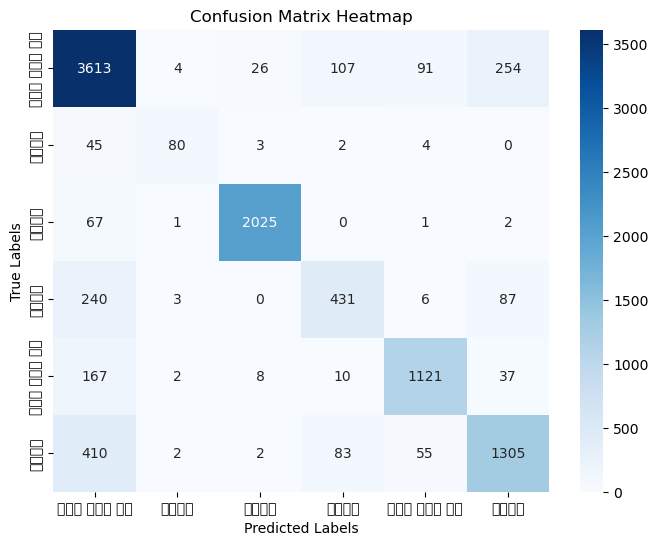

In [39]:

# Compute and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


findfont: Font family 'Noto Sans Ethiopic' not found.
findfont: Font family 'Noto Sans Ethiopic' not found.
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 4608 (\N{ETHIOPIC SYLLABLE HA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 4872 (\N{ETHIOPIC SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 4653 (\N{ETHIOPIC SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 4768 (\N{ETHIOPIC SYLLABLE GLOTTAL A}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 4672 (\N{ETHIOPIC SYLLABLE QA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packag

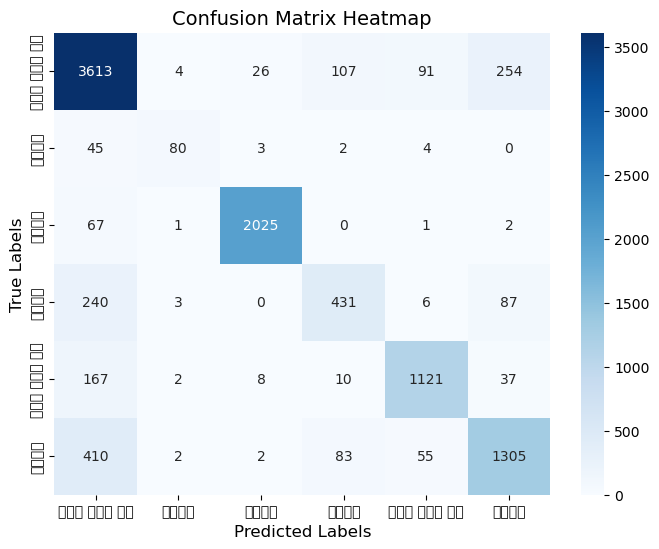

In [40]:
# Assuming y_test and y_pred are your true and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Unique labels in your dataset
labels = np.unique(y_test)

# Create a DataFrame for the confusion matrix
df_cm = pd.DataFrame(conf_matrix, index=labels, columns=labels)

# Set the font to Noto Sans Ethiopic
plt.rcParams['font.family'] = 'Noto Sans Ethiopic'

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix Heatmap', fontsize=14)
plt.show()